In [1]:
import numpy as np
import matplotlib.pyplot as plt
# np.random.seed(42)

# Dataloader

In [2]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__labels = labels
        self.__onehot_labels = self.__onehot(self.__labels, self.__n_classes)
    

    def __onehot(self, labels, n_classes):
        labels_len = len(labels)
        onehot_vectors = np.zeros((labels_len, n_classes), dtype = int)
        for index in range(labels_len):
            onehot_vectors[index, int(labels[index])]= 1
        return onehot_vectors
    
#     def __shuffle_dataset(self):
#         shuffler = np.random.permutation(len(self.__labels))
#         data_shuffled = self.__data[shuffler]
#         self.__data = data_shuffled
#         labels_shuffled = self.__labels[shuffler]
#         self.__labels = labels_shuffled


#     def __shuffle_dataset(self):
#         rand = np.random.permutation(len(self.__data))
#         self.__data = self.__data[rand]
#         self.__onehot_labels = self.__onehot_labels[rand]
    
    def __iter__(self):
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions
The activation function of a node defines the output of that node given an input or set of inputs.It is used to determine the output of neural network. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).<br>
The Activation Functions can be basically divided into 2 types
-    Linear Activation Function
-    Non-linear Activation Functions
<b>1.Linear or Identity Activation Function</b><br>
The function is a line or linear. Therefore, the output of the functions will not be confined between any range. $$ f(x) = x$$ <br>
<b>Non-linear Activation Function</b><br>
The Nonlinear Activation Functions are the most used activation functions. It makes it easy for the model to generalize or adapt with variety of data and to differentiate between the output.<br>
The Nonlinear Activation Functions are mainly divided on the basis of their range or curves.<br>
<b>1. Sigmoid or Logistic Activation Function</b><br>
The Sigmoid Function curve looks like a S-shape.The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice. The logistic sigmoid function can cause a neural network to get stuck at the training time. The softmax function is a more generalized logistic activation function which is used for multiclass classification.\n",
$$ \\phi(z) = \\frac{1}{1+e^{-z}}$$
<b>2.tanh</b>: tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).
<b>2. ReLU (Rectified Linear Unit) Activation Function</b><br>
The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.The ReLU is half rectified (from bottom).But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.
$$ R(z) = max(0, z)$$
<b>3.Leaky ReLU</b><br>
It is an attempt to solve the dying ReLU problem. IN Leaky ReLu the function in the negative range becomes $f(y) = ay$. $a$ is usually 0.1. When it is not 0.01 it is mostly randomized which results in Randomied Leaky ReLU. Both Leaky and Randomized ReLU functions are monotonic in nature. Also, their derivatives also monotonic in nature. Here, $a$ is shown with $negative$ $ slope$.

<b>4.Softmax</b><br>
The Softmax function is used for prediction in multi-class models where it returns probabilities of each class in a group of different classes, with the target class having the highest probability. The calculated probabilities are then helpful in determining the target class for the given inputs. The Softmax function produces an output which is a range of values between 0 and 1, with the sum of the probabilities been equal to 1.


In [3]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value
    
    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
    
class Sigmoid:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        sigmoid_value = 1/(1 + np.exp(-matrix)).astype(float)
        return sigmoid_value
    
    def derivative(self, matrix):
        sigmoid_derivative = np.multiply(self.__val(matrix),(1.0 - self.__val(matrix)))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Relu:
    
    def __init__(self): self.__name__ = 'ReLu'

    def __val(self, matrix):
        relu_value = np.maximum(0, matrix)
        return relu_value

    def derivative(self, matrix):
        relu_derivative = (matrix > 0).astype(int)
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
    
class LeakyRelu:
    def __init__(self, negative_slope=0.1):
        self.negative_slope = 0.1
        
    def __val(self, matrix):
        leaky_relu_value1 = np.multiply((matrix > 0), matrix)
        leaky_relu_value2 = np.multiply((matrix <= 0), matrix * self.negative_slope)
        leaky_relu_value = leaky_relu_value1+leaky_relu_value2
        return leaky_relu_value
    
    def derivative(self, matrix):
        leaky_relu_value_d1 = np.multiply((matrix > 0), 1)
        leaky_relu_value_d2 = np.multiply((matrix <= 0), self.negative_slope)
        leacky_relu_derivative = leaky_relu_value_d1+leaky_relu_value_d2
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Softmax:

    def __init__(self): pass
    
    def __val(self, matrix):
        exp = np.exp(matrix - np.max(matrix))
        exp_sum = np.sum(exp)
        softmax_value = exp/exp_sum
        return softmax_value
    
    def derivative(self, matrix):
        softmax = self.__val(matrix)
        s = softmax.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)
    
    def __call__(self, matrix):
        return self.__val(matrix)
  
    
class Tanh:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        tanh_value = np.tanh(matrix)
#         tanh_value = (np.exp(matrix) - np.exp(-matrix))/(np.exp(matrix) + np.exp(-matrix))
        return tanh_value
    
    def derivative(self, matrix):
        tanh_derivative = 1-np.square(self.__val(matrix))
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function
<b>Cross Entropy</b>: Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.<br>
Cross-entropy can be calculated as:<br>
$$  L = \frac{-1}{m} \sum_{i=1}^{m} y_i .log(\hat y_i) $$
The softmax and the cross entropy loss fit together like bread and butter. Here is why: to train the network with backpropagation, you need to calculate the derivative of the loss. In the general case, that derivative can get complicated. But if you use the softmax and the cross entropy loss, that complexity fades away. Instead of a long clunky formula, you end up with this terse, easy to compute thing:<br><br>
$$ \frac{ \partial L}{\partial l_n} = \hat{y_n} - y_n $$
$\hat{y}$ is $s$ in our code below which is the outcome of the softmax function:

In [4]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        softmax_true_val = softmax(true_val)
        softmax_expected_val = softmax(expected_val)
        cross_entropy_value = np.multiply(softmax_true_val, np.log10(softmax_expected_val))
        cross_entropy_value = cross_entropy_value * -1
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        softmax_true_val = softmax(true_val)
        softmax_expected_val = softmax(expected_val)
        cross_entropy_derivative = np.subtract(softmax_expected_val, softmax_true_val)
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

In [5]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = layer_input
        self.__last_activation_input =  layer_input * self.__weight + self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
        return self.__last_activation_output


    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor) == 2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        backprop_tensor = np.multiply(backprop_tensor, self.__last_activation_derivative)
        weight_derivative = self.__last_input.T * backprop_tensor
        self.__weight = np.subtract(self.__weight, (np.multiply(lr, weight_derivative)))
        bias_derivative = np.ones(shape=(1, backprop_tensor.shape[0])) * backprop_tensor
        self.__bias = np.subtract(self.__bias, (np.multiply(lr, bias_derivative)))
        backprop_tensor = backprop_tensor * np.matrix.transpose(self.__weight)
        return backprop_tensor


    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low, high, size=(dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(mean, var, size=(dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [6]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        thisInput = network_input.copy()
        for eachLayer in self.__layers_list:
            thisOutput = eachLayer.forward(thisInput)
            thisInput = thisOutput
        network_output = thisOutput
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        Dictlog = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            Dictlog['train_accuracy'].append(average_accuracy)
            Dictlog['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                Dictlog['test_accuracy'].append(average_accuracy)
                Dictlog['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return Dictlog
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        yPredicted = self.forward(x_batch)
        predictedLabels = self.__get_labels(yPredicted)
        trueLabels = self.__get_labels(y_batch)
        self.__update_weights(yPredicted, y_batch)
        batch_average_loss = np.mean(self.__loss(trueLabels, predictedLabels))
        batch_accuracy = self.__compute_accuracy(predictedLabels, trueLabels)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        yPredicted = self.forward(x_batch)
        predictedLabels = self.__get_labels(yPredicted)
        trueLabels = self.__get_labels(y_batch)
        batch_average_loss = np.mean(self.__loss(trueLabels, predictedLabels))
        batch_accuracy = self.__compute_accuracy(predictedLabels, trueLabels)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        labels = np.argmax(outputs, axis=1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        accuracy = np.nanmean(output == expected_output)
        return accuracy
    

    def __update_weights(self, output, y_train):
        lossDerivative = self.__loss.derivative(y_train, output)
        for i in range(len(self.__layers_list) - 1, -1, -1):
                lossDerivative = self.__layers_list[i].update_weights(lossDerivative, self.__lr)
        return

# PHASE 1

# Preprocessing

In [7]:
train_data = np.genfromtxt('train_images.csv', delimiter=',')
train_data = np.delete(train_data, 0, axis=0)
train_data = np.delete(train_data, 0, axis=1)

train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
train_labels = np.delete(train_labels, 0, axis=0)
train_labels = np.delete(train_labels, 0, axis=1)

test_data = np.genfromtxt('test_images.csv', delimiter=',')
test_data = np.delete(test_data, 0, axis=0)
test_data = np.delete(test_data, 0, axis=1)

test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
test_labels = np.delete(test_labels, 0, axis=0)
test_labels = np.delete(test_labels, 0, axis=1)

In [8]:
train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
train_labels

array([[19.],
       [ 7.],
       [ 4.],
       ...,
       [ 2.],
       [ 7.],
       [11.]])

In [10]:
test_data 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
test_labels 

array([[19.],
       [10.],
       [12.],
       ...,
       [12.],
       [ 4.],
       [ 1.]])

# Step 1 :
# Showing the random selected sample
### Each pixel is an integer and is in range of 0 to 255

Random sample selected from train Images is sample number : 2412
The Minimum value in all elements of selected sample is :  0.0
The Maximum value in all elements of selected sample is :  255.0


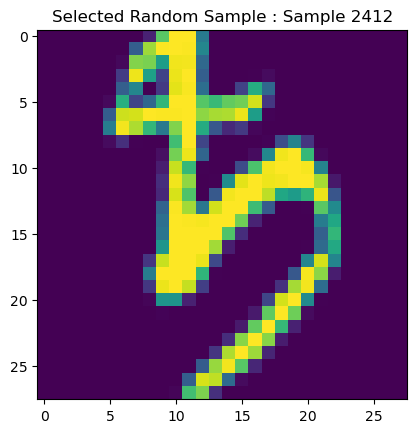

In [12]:
print("Random sample selected from train Images is sample number : 2412")
print("The Minimum value in all elements of selected sample is : ", train_data[2412].min())
print("The Maximum value in all elements of selected sample is : ", train_data[2412].max())

plt.imshow(np.reshape(train_data[2412], (28, 28)))
ImageTitle = "Selected Random Sample : Sample 2412"
plt.title(ImageTitle)
plt.show()

# Step 2 :

In [13]:
def showOneSample(sampleIndex, index):
    plt.imshow(np.reshape(train_data[sampleIndex], (28, 28)))
    ImageTitle = "One of Samples from Class Label " + str(index)
    plt.title(ImageTitle)
    plt.show()

In [14]:
SelectedSamplesIndices = [7, 11, 9, 17, 2, 23, 10, 1, 12, 48, 6, 50, 4, 5, 18, 3, 26, 42, 13, 8]

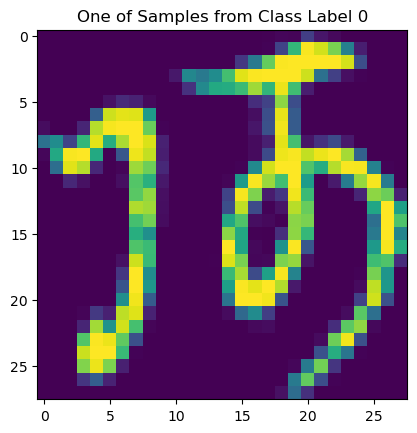

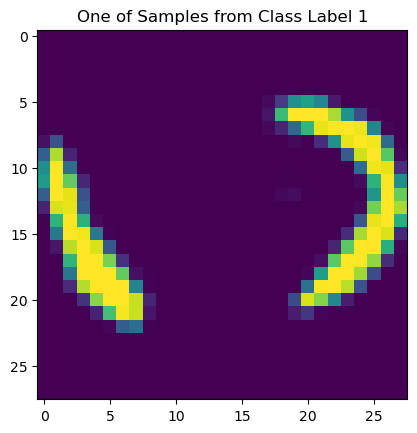

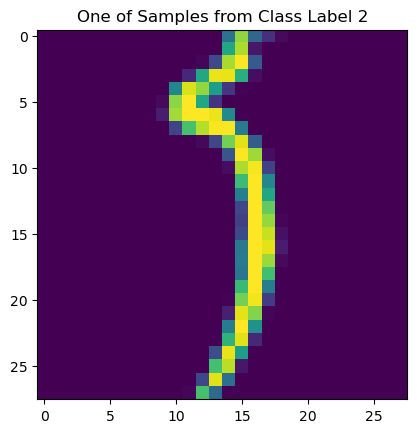

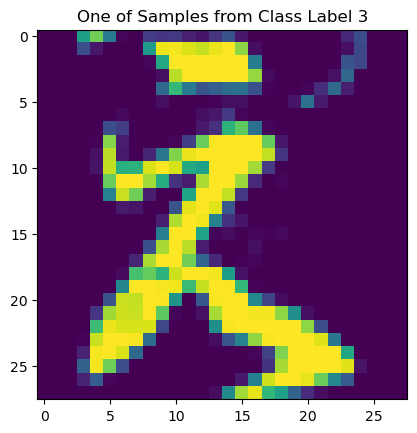

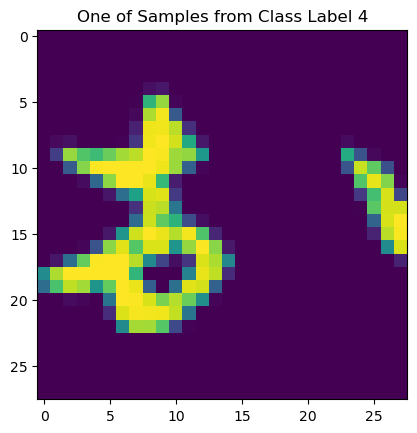

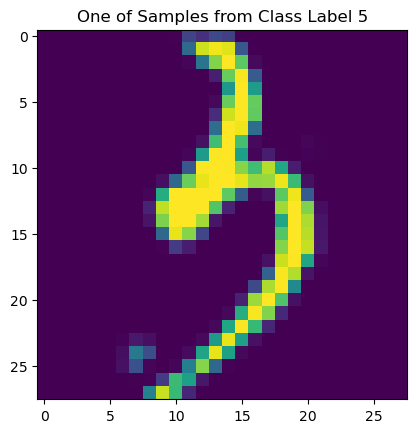

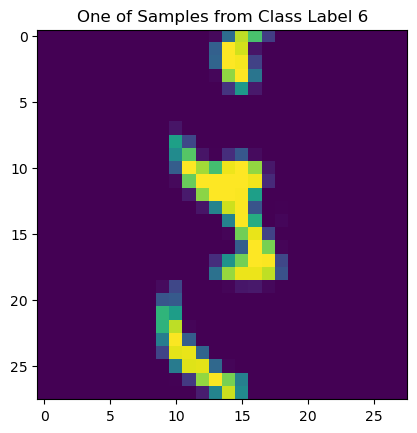

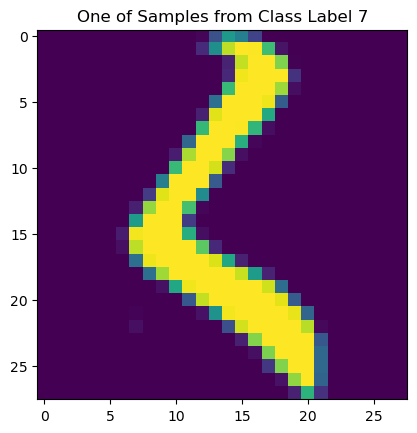

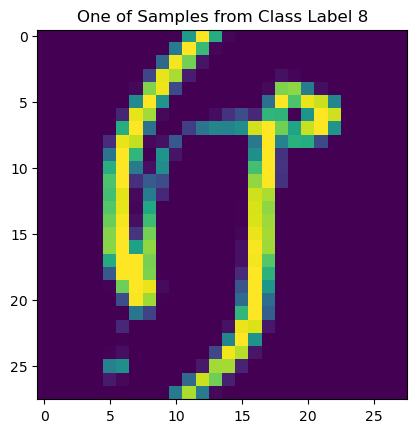

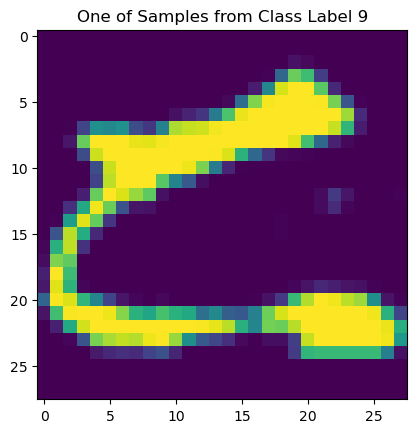

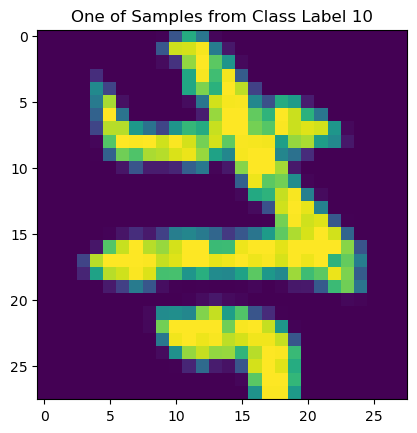

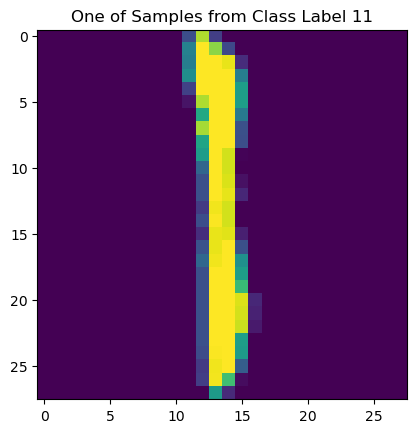

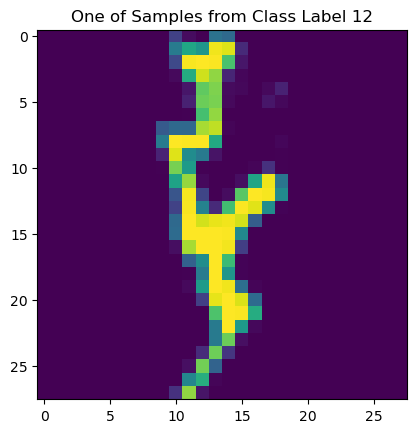

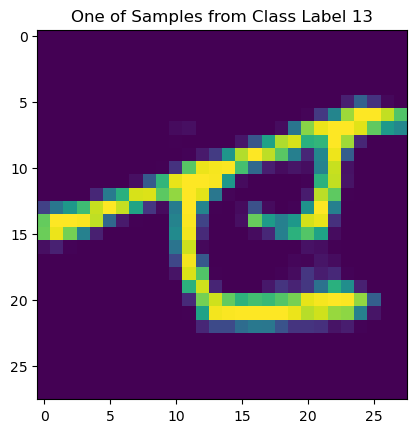

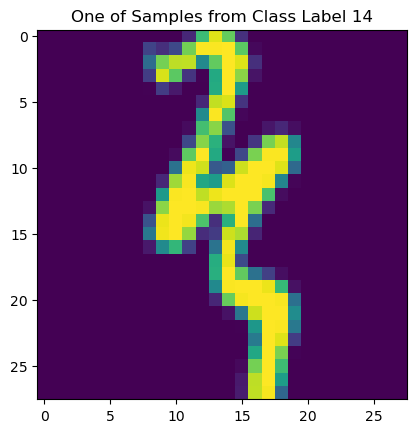

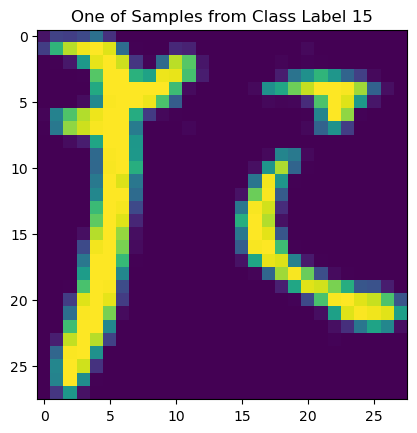

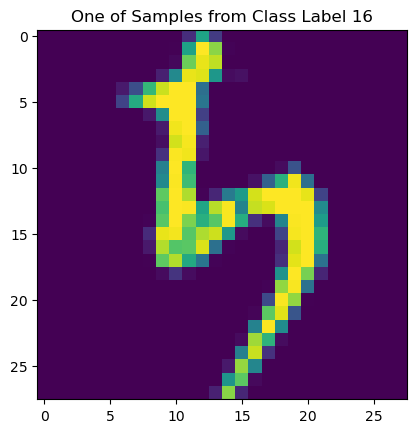

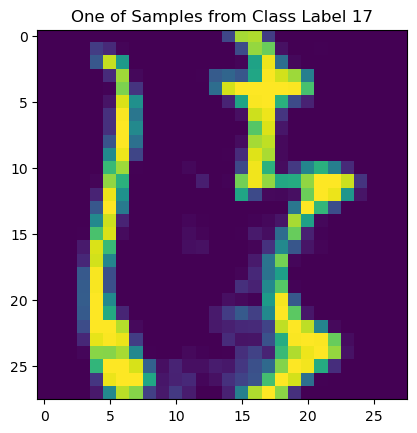

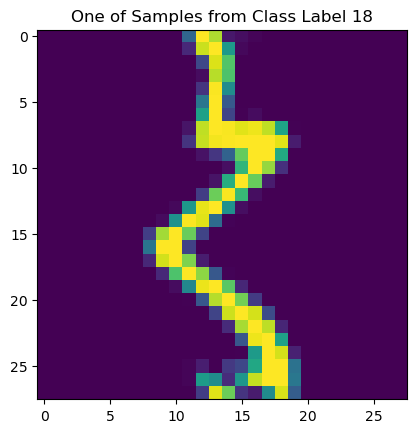

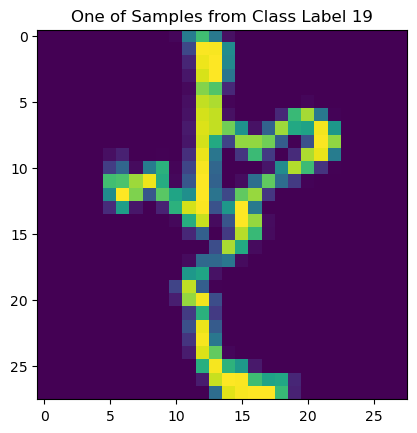

In [15]:
index = 0
for sampleIndex in SelectedSamplesIndices:
    showOneSample(sampleIndex, index)
    index += 1

# Step 3 :

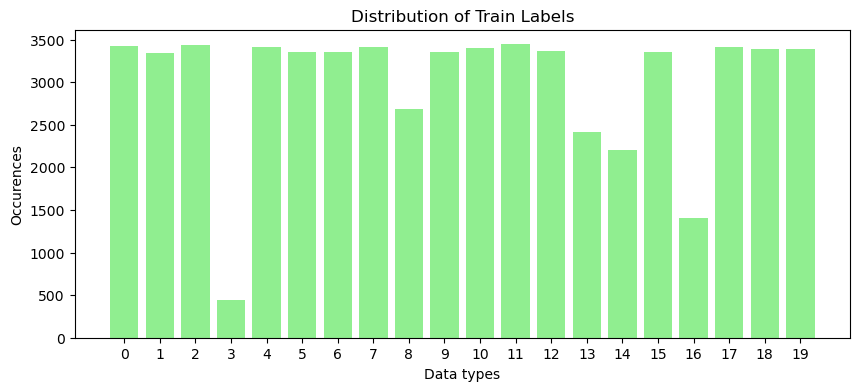

In [16]:
occurrences = []

types = [x for x in range(0, 20)]
for x in types:
    occurrences.append(np.count_nonzero(train_labels == x))
    
fig = plt.figure(figsize = (10, 4)) 
plt.bar(types, occurrences, color ='lightgreen') 
plt.xticks(np.arange(0, 20, 1))
plt.xlabel("Data types")
plt.ylabel("Occurences")
plt.title("Distribution of Train Labels")
plt.show()

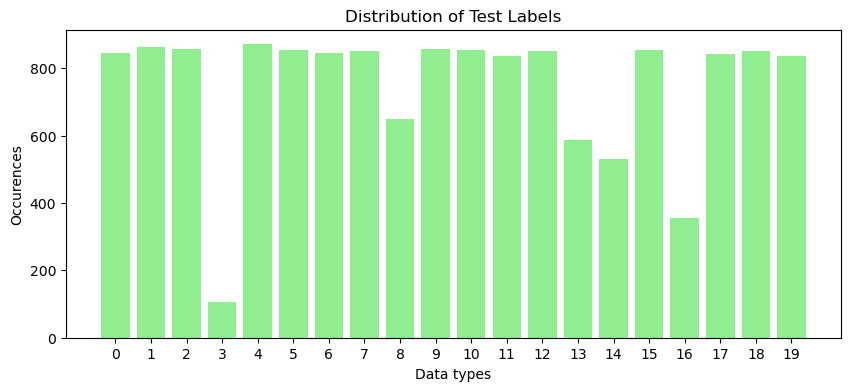

In [17]:
occurrences = []

types = [x for x in range(0, 20)]
for x in types:
    occurrences.append(np.count_nonzero(test_labels == x))
    
fig = plt.figure(figsize = (10, 4)) 
plt.bar(types, occurrences, color ='lightgreen') 
plt.xticks(np.arange(0, 20, 1))
plt.xlabel("Data types")
plt.ylabel("Occurences")
plt.title("Distribution of Test Labels")
plt.show()

# Step 4 :
# Normalization :


<b> Advantages of Normalization</b>: <br>
 - Greater overall dataset organization
 - Reduction of redundant data
 -  Data consistency within the database
 - Easier calculations 
<br>It is important to notice that all thes advantages happen while the outcomes stay the same.

In [18]:
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# PHASE 3 : 

# Step 1 : 

# Training Sample Code

In [19]:
def drawOnePlotACCU(LogDict, firstPara, secPara, epochSize):
    fig = plt.figure(figsize = (8, 3))
    plt.plot(logDict[firstPara], color = 'darkgreen')  
    plt.plot(logDict[secPara], color = 'darkred')
    plt.xticks(np.arange(0, epochSize, 1))
    plt.show()
    
    
def drawOnePlotLOSS(LogDict, firstPara, secPara, epochSize):
    fig = plt.figure(figsize = (8, 3))
    plt.plot(logDict[firstPara], color = 'lightgreen')
    plt.plot(logDict[secPara], color = 'yellow')      
    plt.xticks(np.arange(0, epochSize, 1))
    plt.show()
    
def drawFinalPlot(LogDict ,epochSize):
    drawOnePlotACCU(LogDict, 'train_accuracy', 'test_accuracy', epochSize)
    drawOnePlotLOSS(LogDict, 'train_loss', 'test_loss', epochSize)

In [20]:
def TrainTestNetwork(train_data, train_labels, test_data, test_labels, 
                                     LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 64, activation = Relu()):
    
    train_copy = train_data.copy()
    train_labels_copy = train_labels.copy()
    test_copy = test_data.copy()
    test_labels_copy = test_labels.copy()

    INPUT_SHAPE = 784
    n_classes = 20
    
    TRAINLOADER = Dataloader(train_copy, train_labels_copy, n_classes, batch_size = BATCHSIZE, shuffle=True)
    TESTLOADER = Dataloader(test_copy, test_labels_copy, n_classes, batch_size = BATCHSIZE, shuffle=True)

    
    network = FeedForwardNN(INPUT_SHAPE)
    network.add_layer(32, input_shape=INPUT_SHAPE, activation = activation)
    network.add_layer(32, input_shape=INPUT_SHAPE, activation = activation)     
    network.add_layer(20, activation = Identical())
    network.set_training_param(lr=LEARNING_RATE)

    log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)
    return log

# Step 2
# Zero initialization:
If all the weights are initialized to zeros, the derivatives will remain same for every w in W[l]. As a result, neurons will learn same features in each iterations. This problem is known as network failing to break symmetry. And not only zero, any constant initialization will produce a poor result.


# Step 3 :
# Finding Optimum Learning Rate
In three following cells, The network is trained by 3 different LEARNING RATE <font color='red'>(0.001, 0.01, 0.0001)</font> and <font color='green'>LEARNING RATE = 0.001</font> is selected for rest of the networks to be trained with. <br>
#### To explain this decision : 
- Model with LR = $0.01$ has good accuracy but model overfits train. as it's evident in chart; after 9th epoch. because by increasing LR, model moves very faster to the optimum at each epoch.
- Model with LR = $0.0001$ is moving to optimum point very slowly and changes in each epoch is less, therefor this model needs more than 20 epoches to get the optimum point and give us good accuracy.

Epoch 1:
	Train: Average Accuracy: 0.06583155650319829	Average Loss: 0.05935408334445041
	Test: Average Accuracy: 0.0660017730496454	Average Loss: 0.07606428253030763
Epoch 2:
	Train: Average Accuracy: 0.06451559168443496	Average Loss: 0.05779445634872288
	Test: Average Accuracy: 0.06631205673758865	Average Loss: 0.050820602919492724
Epoch 3:
	Train: Average Accuracy: 0.06404917377398721	Average Loss: 0.053765969711023105
	Test: Average Accuracy: 0.06604609929078015	Average Loss: 0.04992199197295013
Epoch 4:
	Train: Average Accuracy: 0.06416577825159915	Average Loss: 0.053455704679675795
	Test: Average Accuracy: 0.0661790780141844	Average Loss: 0.049402901142847205
Epoch 5:
	Train: Average Accuracy: 0.06418243603411514	Average Loss: 0.05379447811960186
	Test: Average Accuracy: 0.0661790780141844	Average Loss: 0.049326162026560316
Epoch 6:
	Train: Average Accuracy: 0.06429904051172708	Average Loss: 0.05453401468122962
	Test: Average Accuracy: 0.06651152482269504	Average Loss: 0.04928138

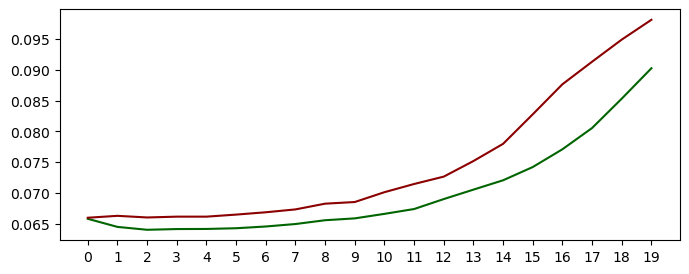

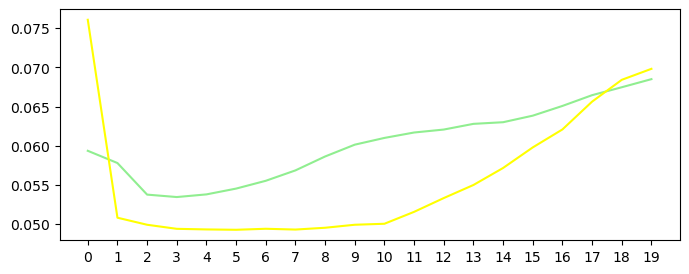

In [21]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 64, activation = Relu())
drawFinalPlot(logDict ,20)

Epoch 1:
	Train: Average Accuracy: 0.05412113539445629	Average Loss: 0.052860693901263585
	Test: Average Accuracy: 0.05919769503546099	Average Loss: 0.04839139722385205
Epoch 2:
	Train: Average Accuracy: 0.05928504797441365	Average Loss: 0.055677990878188456
	Test: Average Accuracy: 0.06382978723404255	Average Loss: 0.04678454491949891
Epoch 3:
	Train: Average Accuracy: 0.06871335287846482	Average Loss: 0.058279710225690964
	Test: Average Accuracy: 0.07457890070921985	Average Loss: 0.056486507393983684
Epoch 4:
	Train: Average Accuracy: 0.09616537846481876	Average Loss: 0.06631443312763864
	Test: Average Accuracy: 0.09545656028368793	Average Loss: 0.06261222666289647
Epoch 5:
	Train: Average Accuracy: 0.10972481343283583	Average Loss: 0.06654381136953753
	Test: Average Accuracy: 0.10237145390070922	Average Loss: 0.05845821237294653
Epoch 6:
	Train: Average Accuracy: 0.11273987206823027	Average Loss: 0.06530462038604308
	Test: Average Accuracy: 0.10026595744680851	Average Loss: 0.054389

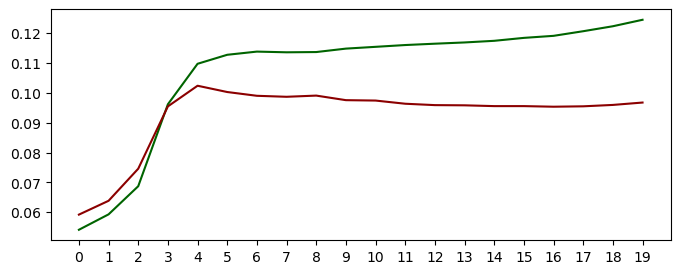

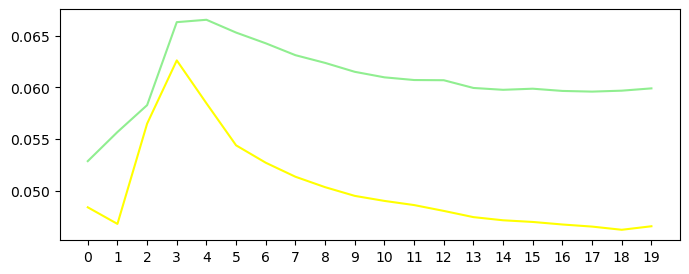

In [22]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.01, EPOCHS = 20, BATCHSIZE = 64, activation = Relu())
drawFinalPlot(logDict ,20)

Epoch 1:
	Train: Average Accuracy: 0.061883662046908317	Average Loss: 0.08438834787780755
	Test: Average Accuracy: 0.06551418439716311	Average Loss: 0.08897182510940603
Epoch 2:
	Train: Average Accuracy: 0.06496535181236673	Average Loss: 0.053756400754895906
	Test: Average Accuracy: 0.06323138297872341	Average Loss: 0.05369826628607061
Epoch 3:
	Train: Average Accuracy: 0.06454890724946695	Average Loss: 0.051712881570448316
	Test: Average Accuracy: 0.06695478723404255	Average Loss: 0.0474993402746069
Epoch 4:
	Train: Average Accuracy: 0.06474880063965885	Average Loss: 0.04846285524567155
	Test: Average Accuracy: 0.0680186170212766	Average Loss: 0.04576827945540201
Epoch 5:
	Train: Average Accuracy: 0.06488206289978678	Average Loss: 0.04781266918848658
	Test: Average Accuracy: 0.06808510638297872	Average Loss: 0.04568156702426617
Epoch 6:
	Train: Average Accuracy: 0.06438232942430704	Average Loss: 0.04834946769331675
	Test: Average Accuracy: 0.06815159574468085	Average Loss: 0.046235890

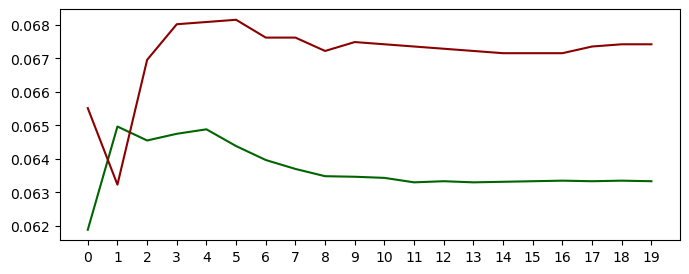

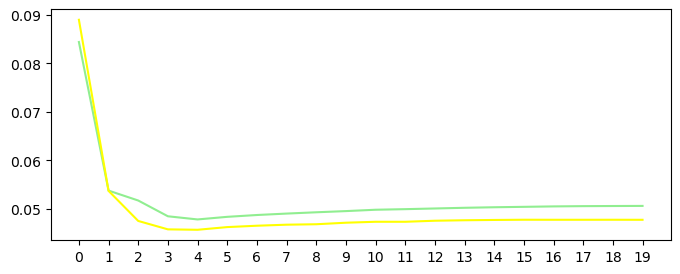

In [23]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.0001, EPOCHS = 20, BATCHSIZE = 64, activation = Relu())
drawFinalPlot(logDict ,20)

# Step 4 :
# Activation Function


<b>Sigmoid and Tanh : <br></b>with sigmoid we have the problem of <b>vanishing gradient</b>, which means the derivatives become smaller and smaller untill they vanish (underflow). It makes neural networks inefficient. This problem exists for both <b>sigmoid</b> and <b>tanh</b>. However, it is less prominent in tanh.

<b>Advantages of Leaky Relu</b>: 
- It isn’t limited by the ‘zero dying’ problem because it doesn’t have 0 slope(the negative part).<br>
- Leaky ReLU is a bit more balanced(also the negative values are near 0) so the overall training time of the model is low.<br>
Disadvantage:
- The coefficient of x is predefined and the Neural Network doesn’t decide the coefficient itself.

Epoch 1:
	Train: Average Accuracy: 0.056869669509594885	Average Loss: 0.028241620062292486
	Test: Average Accuracy: 0.05675975177304965	Average Loss: 0.028346188645176903
Epoch 2:
	Train: Average Accuracy: 0.056869669509594885	Average Loss: 0.028241620062292486
	Test: Average Accuracy: 0.05675975177304965	Average Loss: 0.028346188645176903
Epoch 3:
	Train: Average Accuracy: 0.056869669509594885	Average Loss: 0.028241620062292486
	Test: Average Accuracy: 0.05675975177304965	Average Loss: 0.028346188645176903
Epoch 4:
	Train: Average Accuracy: 0.056869669509594885	Average Loss: 0.028241620062292486
	Test: Average Accuracy: 0.05675975177304965	Average Loss: 0.028346188645176903
Epoch 5:
	Train: Average Accuracy: 0.05203891257995735	Average Loss: 0.031130025546224824
	Test: Average Accuracy: 0.028191489361702127	Average Loss: 0.05640697860788999
Epoch 6:
	Train: Average Accuracy: 0.0554704157782516	Average Loss: 0.029293337837745653
	Test: Average Accuracy: 0.0563386524822695	Average Loss:

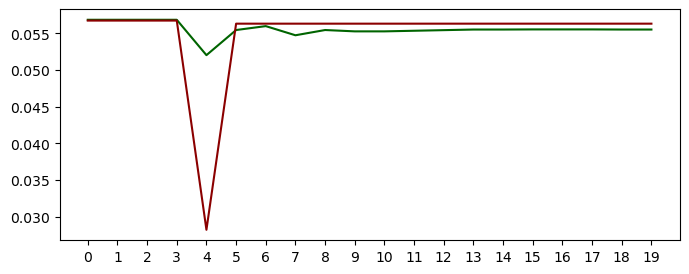

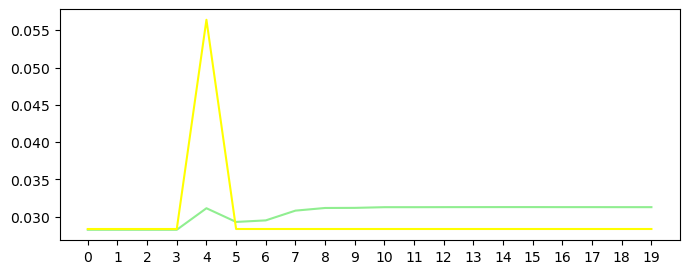

In [24]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 64, activation = Sigmoid())
drawFinalPlot(logDict ,20)

Epoch 1:
	Train: Average Accuracy: 0.056070095948827295	Average Loss: 0.028259003640741694
	Test: Average Accuracy: 0.05693705673758865	Average Loss: 0.02834532581367327
Epoch 2:
	Train: Average Accuracy: 0.056070095948827295	Average Loss: 0.028241405352687564
	Test: Average Accuracy: 0.05740248226950354	Average Loss: 0.02834101651369851
Epoch 3:
	Train: Average Accuracy: 0.05608675373134328	Average Loss: 0.02823116939591647
	Test: Average Accuracy: 0.05746897163120567	Average Loss: 0.02833329973582667
Epoch 4:
	Train: Average Accuracy: 0.05593683368869936	Average Loss: 0.02887342493712076
	Test: Average Accuracy: 0.05726950354609928	Average Loss: 0.02929622603853723
Epoch 5:
	Train: Average Accuracy: 0.05132262793176972	Average Loss: 0.03520319140317448
	Test: Average Accuracy: 0.05565159574468085	Average Loss: 0.04637442633900016
Epoch 6:
	Train: Average Accuracy: 0.056419909381663115	Average Loss: 0.03186656756241343
	Test: Average Accuracy: 0.05591755319148936	Average Loss: 0.04376

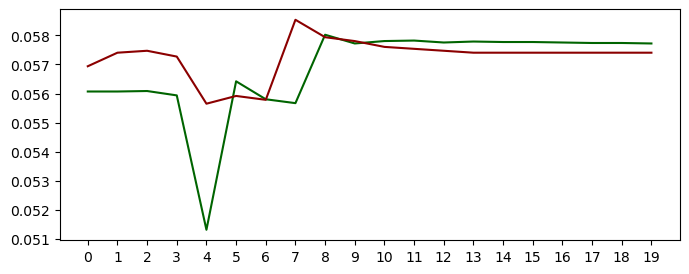

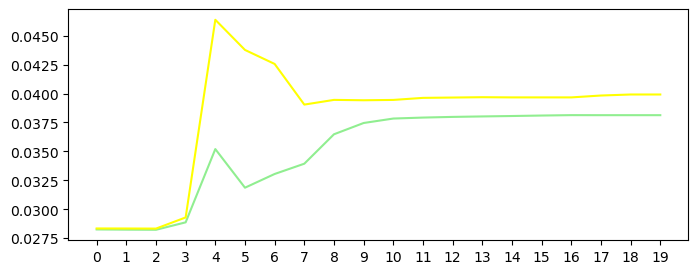

In [25]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 64, activation = Tanh())
drawFinalPlot(logDict ,20)

Epoch 1:
	Train: Average Accuracy: 0.0550872867803838	Average Loss: 0.10087561345693341
	Test: Average Accuracy: 0.05640514184397163	Average Loss: 0.09719497698361143
Epoch 2:
	Train: Average Accuracy: 0.054171108742004266	Average Loss: 0.1002162025700764
	Test: Average Accuracy: 0.05640514184397163	Average Loss: 0.09466615357507584
Epoch 3:
	Train: Average Accuracy: 0.05477078891257996	Average Loss: 0.10195011755352802
	Test: Average Accuracy: 0.05647163120567376	Average Loss: 0.10144244296832795
Epoch 4:
	Train: Average Accuracy: 0.05525386460554371	Average Loss: 0.10894291855832954
	Test: Average Accuracy: 0.05680407801418439	Average Loss: 0.10699101626199824
Epoch 5:
	Train: Average Accuracy: 0.05580357142857143	Average Loss: 0.11598650878851356
	Test: Average Accuracy: 0.05726950354609928	Average Loss: 0.11365915645703673
Epoch 6:
	Train: Average Accuracy: 0.056353278251599144	Average Loss: 0.11989867135514283
	Test: Average Accuracy: 0.05773492907801418	Average Loss: 0.1164433100

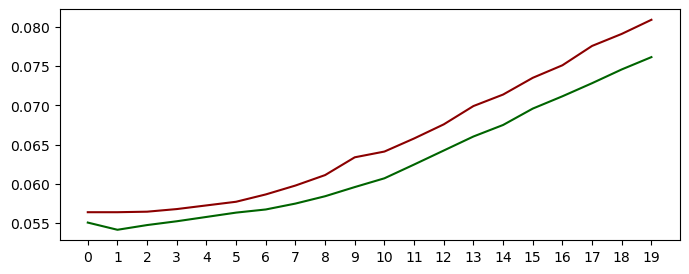

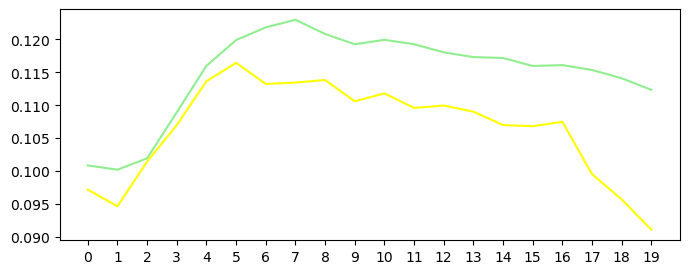

In [26]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 64, activation = LeakyRelu())
drawFinalPlot(logDict ,20)

# Step 5 :
# Batch Size : 

<b>batch size = 16 :</b><br>
- Model trains slow because data is in small batches.
- The accuracy has come better.
- Generalization is too much.
<br><br>

<b>batch size = 256 :</b><br>
- Model trains fast.
- The accuracy is so bad and it improves after many epoches.
<br><br>

<b>batch size = 64 & 32 :</b><br>
Model with <font color='red'>batch size = 64</font> nad <font color='red'>batch size = 32</font> arr better because : 
- Model doesn'e train too slow.
- Generalization is too little in both cases (64 and 32)

Thse selected bach size is 32 because it get better accuracy at the end of 20th epoch.

<b>Why do we use batches?</b> <br>
Before loading the data set to the memory we have two options:

1. You can either load the whole data set to the memory at once or

2. You can load a sample set of data into the memory

You may be having a data set of huge size So, if you load the whole data set into the memory, the training speed of the model will be very slow because you are using a lot of memory in your CPU which is very inefficient.You can break your data set into batches, that is, if you have a data set containing ten images, you can split your data set into two batches where each batch has five images. Here we have 60000 images by making 16 batched we have 3750 images in each batch. Hence, it is easier to handle them in memory.<br><br>
Another reason for why you should consider using batch is that when you train your deep learning model without splitting to batches, then your deep learning algorithm(may be a neural network) has to store errors values for all those 60000 images in the memory and this will cause a great decrease in speed of training.The model updates the hyper parameters(weights and bias) only after passing through the whole data set. But, if you split your 60000 image data set into batches containing 3750 images, the model has to only store the error values of those 3750 images. Or you could have even more batches and fewer images in each batch.<br><br>
<b>It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize.</b> However, because of the advantages above we still use batches. Very small batches are no different than not using any batches at all and make a shortage in memory or when working with images there could be less accuracy since each batch seems to extract different features from various parts of the image (Similar to maybe what convolutional neural networks do).

Epoch 1:
	Train: Average Accuracy: 0.05416666666666667	Average Loss: 0.16984078652325782
	Test: Average Accuracy: 0.057769189765458424	Average Loss: 0.11978363712555815
Epoch 2:
	Train: Average Accuracy: 0.05555	Average Loss: 0.185775135647723
	Test: Average Accuracy: 0.058368869936034115	Average Loss: 0.1464577490620282
Epoch 3:
	Train: Average Accuracy: 0.057916666666666665	Average Loss: 0.2003170489642738
	Test: Average Accuracy: 0.05970149253731343	Average Loss: 0.17987070430563
Epoch 4:
	Train: Average Accuracy: 0.06021666666666667	Average Loss: 0.2051909849752012
	Test: Average Accuracy: 0.06143390191897655	Average Loss: 0.21248581161326646
Epoch 5:
	Train: Average Accuracy: 0.06296666666666667	Average Loss: 0.20918049762183977
	Test: Average Accuracy: 0.06263326226012793	Average Loss: 0.2273647130736817
Epoch 6:
	Train: Average Accuracy: 0.06528333333333333	Average Loss: 0.21012559393153557
	Test: Average Accuracy: 0.06409914712153518	Average Loss: 0.24686788026574152
Epoch 7:
	

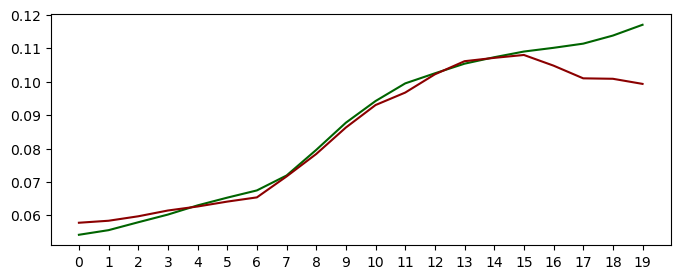

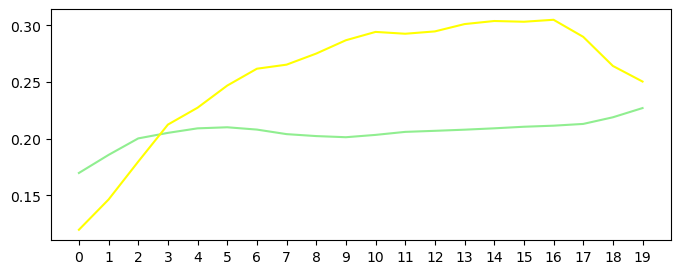

In [27]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 16, activation = LeakyRelu())
drawFinalPlot(logDict ,20)

Epoch 1:
	Train: Average Accuracy: 0.06251666666666666	Average Loss: 0.0893466573458761
	Test: Average Accuracy: 0.06623134328358209	Average Loss: 0.08573091522340254
Epoch 2:
	Train: Average Accuracy: 0.06313333333333333	Average Loss: 0.0933968629709559
	Test: Average Accuracy: 0.06616471215351813	Average Loss: 0.08585556990304506
Epoch 3:
	Train: Average Accuracy: 0.06296666666666667	Average Loss: 0.09429783531413143
	Test: Average Accuracy: 0.06616471215351813	Average Loss: 0.08918291336666401
Epoch 4:
	Train: Average Accuracy: 0.06308333333333334	Average Loss: 0.10128097785393046
	Test: Average Accuracy: 0.06629797441364606	Average Loss: 0.09725384501584984
Epoch 5:
	Train: Average Accuracy: 0.06338333333333333	Average Loss: 0.11579141097497127
	Test: Average Accuracy: 0.06656449893390191	Average Loss: 0.11053016487582815
Epoch 6:
	Train: Average Accuracy: 0.06373333333333334	Average Loss: 0.13309565130819792
	Test: Average Accuracy: 0.06669776119402986	Average Loss: 0.125612980048

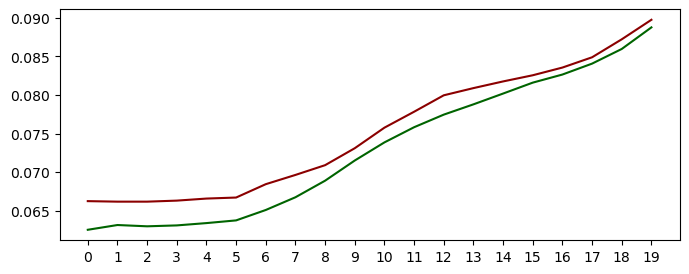

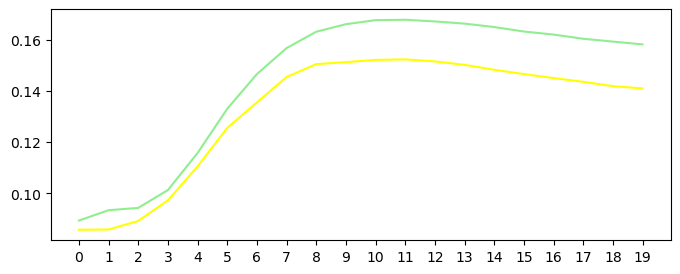

In [28]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 32, activation = LeakyRelu())
drawFinalPlot(logDict ,20)

Epoch 1:
	Train: Average Accuracy: 0.062466755319148935	Average Loss: 0.017038439634698303
	Test: Average Accuracy: 0.05917916480820696	Average Loss: 0.014774053412639236
Epoch 2:
	Train: Average Accuracy: 0.06938164893617021	Average Loss: 0.01586720744953248
	Test: Average Accuracy: 0.061695054638715434	Average Loss: 0.015544324248525582
Epoch 3:
	Train: Average Accuracy: 0.06887189716312057	Average Loss: 0.01741451878939965
	Test: Average Accuracy: 0.06244424620874219	Average Loss: 0.01679681997310112
Epoch 4:
	Train: Average Accuracy: 0.06866688829787235	Average Loss: 0.019147401706374797
	Test: Average Accuracy: 0.06259756913470116	Average Loss: 0.01796553839402358
Epoch 5:
	Train: Average Accuracy: 0.06805186170212765	Average Loss: 0.020537992526090728
	Test: Average Accuracy: 0.06306102252453168	Average Loss: 0.018898444819985816
Epoch 6:
	Train: Average Accuracy: 0.06710438829787234	Average Loss: 0.021827718779608412
	Test: Average Accuracy: 0.06281709968777877	Average Loss: 0.0

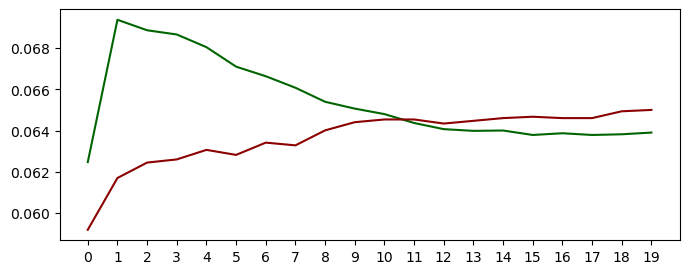

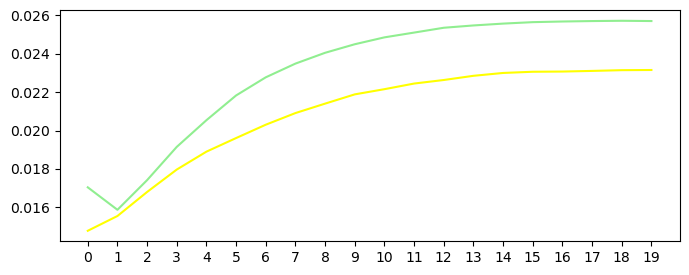

In [29]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 20, BATCHSIZE = 256, activation = LeakyRelu())
drawFinalPlot(logDict ,20)

# Step 6 :
# The Importance of Epochs :

<b>Epoch</b><br>
An epoch describes the number of times the algorithm sees the entire data set. So, each time the algorithm has seen all samples in the dataset, an epoch has completed.

<b>Iteration</b><br>
An iteration describes the number of times a batch of data passed through the algorithm. In the case of neural networks, that means the forward pass and backward pass. So, every time you pass a batch of data through the NN, you completed an iteration.<br>
<br>
Therefore, each epoch results in an entire optimization on our dataset. If you have a small number of epochs in your training, it would be poor and you would realize the effects of underfitting. On the other hand, if you train the network too much, it would train the noises of training inputs.<br><br>
Here we increase the number epochs to evaluate the effect of the number of epochs. By <font color = 'red'> epoch = 35 and 45</font> ; We see after some epochs the networks is overfitting the training dataset (train the noises of training dataset but can not perform well on test datasets). That is why we specify epochs such that this problem does not happen, which is called <b>early stopping</b>






Epoch 1:
	Train: Average Accuracy: 0.05375	Average Loss: 0.06495206856318482
	Test: Average Accuracy: 0.056281094527363185	Average Loss: 0.04791869964970174
Epoch 2:
	Train: Average Accuracy: 0.05575	Average Loss: 0.06999682702958725
	Test: Average Accuracy: 0.056281094527363185	Average Loss: 0.04971248830144913
Epoch 3:
	Train: Average Accuracy: 0.05595	Average Loss: 0.07111577707808522
	Test: Average Accuracy: 0.05634772565742715	Average Loss: 0.04873501863950923
Epoch 4:
	Train: Average Accuracy: 0.0562	Average Loss: 0.06853555138041212
	Test: Average Accuracy: 0.05648098791755508	Average Loss: 0.047986357663382044
Epoch 5:
	Train: Average Accuracy: 0.05648333333333334	Average Loss: 0.06751672255571729
	Test: Average Accuracy: 0.05690298507462686	Average Loss: 0.04759242065275466


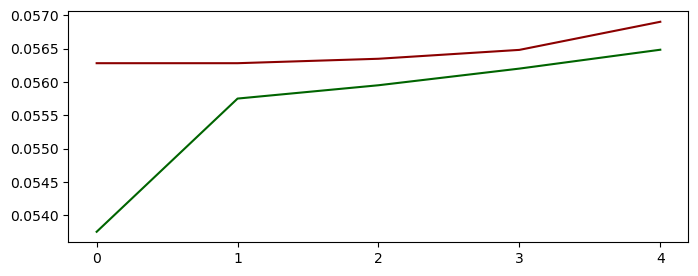

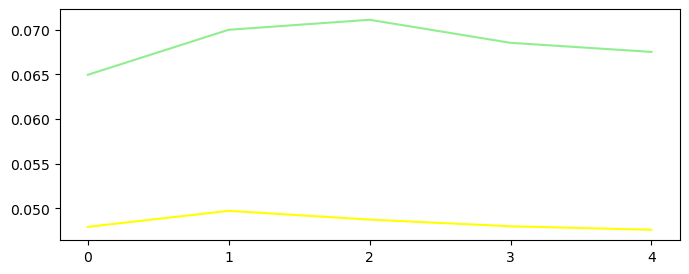

In [30]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 5, BATCHSIZE = 32, activation = LeakyRelu())
drawFinalPlot(logDict ,5)

Epoch 1:
	Train: Average Accuracy: 0.06105	Average Loss: 0.10367737060803205
	Test: Average Accuracy: 0.0607453802416489	Average Loss: 0.11984634019846496
Epoch 2:
	Train: Average Accuracy: 0.06085	Average Loss: 0.11414261985408575
	Test: Average Accuracy: 0.060878642501776825	Average Loss: 0.12068937537327722
Epoch 3:
	Train: Average Accuracy: 0.063	Average Loss: 0.11588676496153831
	Test: Average Accuracy: 0.06447672352523098	Average Loss: 0.12092413711754697
Epoch 4:
	Train: Average Accuracy: 0.06956666666666667	Average Loss: 0.11973211863530245
	Test: Average Accuracy: 0.06927416488983654	Average Loss: 0.12096644495877368
Epoch 5:
	Train: Average Accuracy: 0.07718333333333334	Average Loss: 0.12385045019622552
	Test: Average Accuracy: 0.0748045486851457	Average Loss: 0.12264056854701764
Epoch 6:
	Train: Average Accuracy: 0.0838	Average Loss: 0.1267390212237341
	Test: Average Accuracy: 0.07920220326936746	Average Loss: 0.12304537947132663
Epoch 7:
	Train: Average Accuracy: 0.08946666

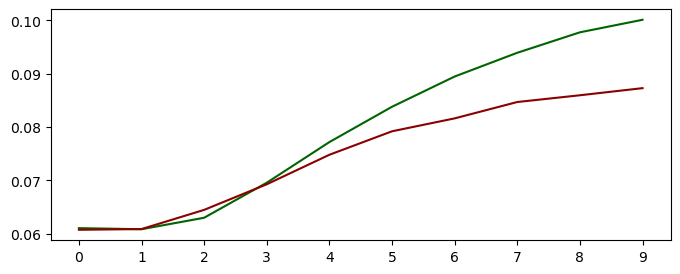

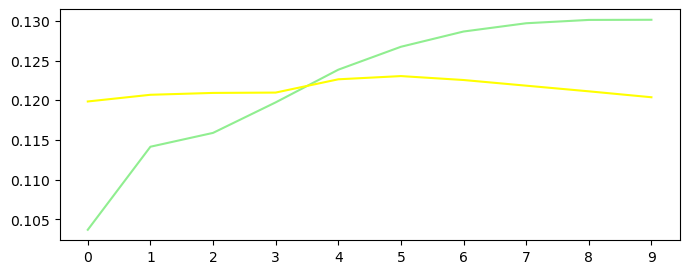

In [31]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 10, BATCHSIZE = 32, activation = LeakyRelu())
drawFinalPlot(logDict ,10)

Epoch 1:
	Train: Average Accuracy: 0.059	Average Loss: 0.12766995651050914
	Test: Average Accuracy: 0.05714729921819474	Average Loss: 0.13723187111343993
Epoch 2:
	Train: Average Accuracy: 0.05938333333333334	Average Loss: 0.10870845365834846
	Test: Average Accuracy: 0.061878109452736314	Average Loss: 0.1413958607628539
Epoch 3:
	Train: Average Accuracy: 0.06353333333333333	Average Loss: 0.11682227366960275
	Test: Average Accuracy: 0.06734186211798153	Average Loss: 0.13935408717290035
Epoch 4:
	Train: Average Accuracy: 0.06965	Average Loss: 0.12623050983019368
	Test: Average Accuracy: 0.07320540156361052	Average Loss: 0.13926685620465096
Epoch 5:
	Train: Average Accuracy: 0.0768	Average Loss: 0.13176563199920063
	Test: Average Accuracy: 0.07680348258706468	Average Loss: 0.13648830083948837
Epoch 6:
	Train: Average Accuracy: 0.08383333333333333	Average Loss: 0.13575580089388284
	Test: Average Accuracy: 0.08015724946695096	Average Loss: 0.1342646763010061
Epoch 7:
	Train: Average Accurac

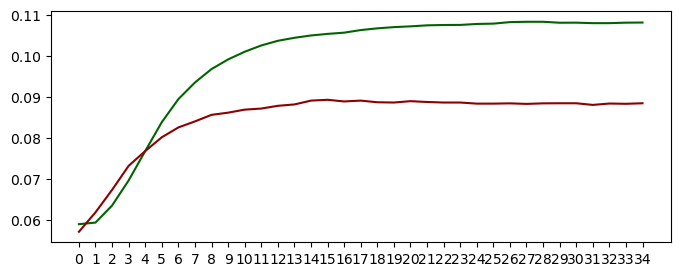

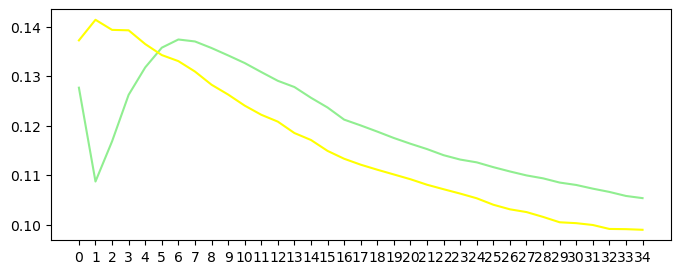

In [32]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 35, BATCHSIZE = 32, activation = LeakyRelu())
drawFinalPlot(logDict ,35)

Epoch 1:
	Train: Average Accuracy: 0.05335	Average Loss: 0.08934661785998495
	Test: Average Accuracy: 0.05421552949538024	Average Loss: 0.07668169301080185
Epoch 2:
	Train: Average Accuracy: 0.05338333333333333	Average Loss: 0.0930321128949362
	Test: Average Accuracy: 0.053615849324804545	Average Loss: 0.08752382411811571
Epoch 3:
	Train: Average Accuracy: 0.0532	Average Loss: 0.09556896552146452
	Test: Average Accuracy: 0.05388237384506041	Average Loss: 0.08509011570158145
Epoch 4:
	Train: Average Accuracy: 0.05368333333333333	Average Loss: 0.09268969219828471
	Test: Average Accuracy: 0.054615316275764034	Average Loss: 0.0800444018876963
Epoch 5:
	Train: Average Accuracy: 0.05463333333333333	Average Loss: 0.08947034618391941
	Test: Average Accuracy: 0.05634772565742715	Average Loss: 0.07340107708712883
Epoch 6:
	Train: Average Accuracy: 0.05585	Average Loss: 0.09130937770052194
	Test: Average Accuracy: 0.05894633972992182	Average Loss: 0.06686548725425366
Epoch 7:
	Train: Average Accu

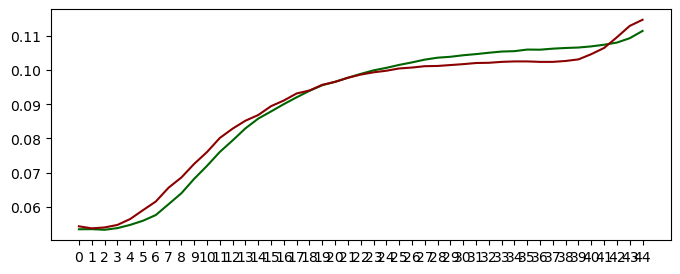

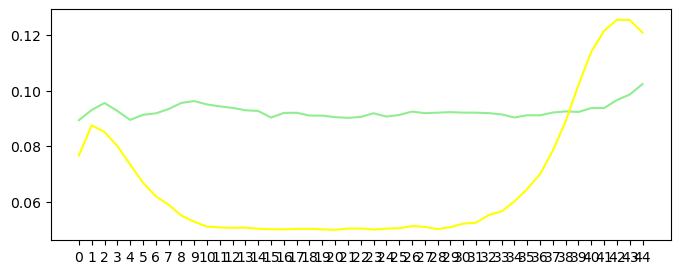

In [33]:
logDict = TrainTestNetwork(train_data, train_labels, test_data, test_labels, LEARNING_RATE = 0.001, EPOCHS = 45, BATCHSIZE = 32, activation = LeakyRelu())
drawFinalPlot(logDict ,45)